In [25]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sb
from sklearn.preprocessing import  LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from catboost import CatBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
pd.options.display.max_columns = 0

In [26]:
df_origin = pd.read_csv('train.csv')

In [27]:
final_df = pd.read_csv('df_final.csv')

In [28]:
final_df.head()

,log_price,cleaning_fee,host_has_profile_pic,host_identity_verified,instant_bookable,number_of_reviews,thumbnail_url,zipcode,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Boutique hotel,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Condominium,property_type_Dorm,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_House,property_type_In-law,property_type_Loft,property_type_Other,property_type_Timeshare,property_type_Townhouse,property_type_Villa,accommodates_1,accommodates_2,accommodates_3,accommodates_4,accommodates_5,accommodates_6,accommodates_7,accommodates_8,accommodates_9,accommodates_10,accommodates_11,accommodates_12,accommodates_13,...,bathrooms_7.5,bathrooms_8.0,check_in_24h,air_conditioning,high_end_electronics,bbq,balcony,breakfast,tv,coffee_machine,cooking_basics,white_goods,elevator,gym,child_friendly,parking,outdoor_space,host_greeting,hot_tub_sauna_or_pool,internet,long_term_stays,pets_allowed,private_entrance,secure,smoking_allowed,accessible,event_suitable,Boston,Chicago,DC,LA,NYC,SF,time_since_last_review,host_since_day,super_host,median_home_value,lat_center,long_center,distance_to_center
0,5.010635,1,1,1,0,1.098612,1,11201,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,2556.0,4131,0,817.924202,40.7200,-74.0060,0.165928
1,5.129899,1,1,0,1,1.945910,1,10019,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,2124.0,2220,0,899.221886,40.7200,-74.0060,0.221665
2,4.976734,1,1,1,1,2.397895,1,10027,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,2133.0,2457,0,846.226920,40.7200,-74.0060,0.328448
3,6.620073,1,1,1,0,0.000000,1,94117,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0.0,3012,0,954.725091,37.7749,-122.4194,0.112058
4,4.744932,1,1,1,1,1.609438,0,20009,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,2368.0,3061,0,734.438561,38.9072,-77.0369,0.136273


### Data scaled

In [29]:
del final_df['zipcode']

In [30]:
from sklearn.preprocessing import MinMaxScaler
features=['median_home_value','distance_to_center','time_since_last_review','host_since_day','number_of_reviews']
# Perform min-max scaling
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(final_df[features])

# Create a new DataFrame with scaled features
data_scaled = pd.DataFrame(data_scaled,columns=features)
final_df[features]=data_scaled
final_df.head()


,log_price,cleaning_fee,host_has_profile_pic,host_identity_verified,instant_bookable,number_of_reviews,thumbnail_url,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Boutique hotel,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Condominium,property_type_Dorm,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_House,property_type_In-law,property_type_Loft,property_type_Other,property_type_Timeshare,property_type_Townhouse,property_type_Villa,accommodates_1,accommodates_2,accommodates_3,accommodates_4,accommodates_5,accommodates_6,accommodates_7,accommodates_8,accommodates_9,accommodates_10,accommodates_11,accommodates_12,accommodates_13,accommodates_14,...,bathrooms_7.5,bathrooms_8.0,check_in_24h,air_conditioning,high_end_electronics,bbq,balcony,breakfast,tv,coffee_machine,cooking_basics,white_goods,elevator,gym,child_friendly,parking,outdoor_space,host_greeting,hot_tub_sauna_or_pool,internet,long_term_stays,pets_allowed,private_entrance,secure,smoking_allowed,accessible,event_suitable,Boston,Chicago,DC,LA,NYC,SF,time_since_last_review,host_since_day,super_host,median_home_value,lat_center,long_center,distance_to_center
0,5.010635,1,1,1,0,0.184220,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0.483084,0.576242,0,0.748624,40.7200,-74.0060,0.179495
1,5.129899,1,1,0,1,0.326299,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0.401436,0.030554,0,0.860864,40.7200,-74.0060,0.243939
2,4.976734,1,1,1,1,0.402090,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0.403137,0.098230,0,0.787699,40.7200,-74.0060,0.367405
3,6.620073,1,1,1,0,0.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0.000000,0.256710,0,0.937492,37.7749,-122.4194,0.117210
4,4.744932,1,1,1,1,0.269878,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0.447552,0.270702,0,0.633364,38.9072,-77.0369,0.145208


In [31]:
del final_df['lat_center']
del final_df['long_center']


In [32]:
# df_random_10_percent = final_df.sample(frac=0.10)

In [33]:

X = final_df.drop(['log_price'], axis =1)
y = final_df.log_price

In [34]:
y

0        5.010635
1        5.129899
2        4.976734
3        6.620073
4        4.744932
           ...   
73946    4.605170
73947    5.043425
73948    5.220356
73949    5.273000
73950    4.852030
Name: log_price, Length: 73951, dtype: float64

In [35]:
X

,cleaning_fee,host_has_profile_pic,host_identity_verified,instant_bookable,number_of_reviews,thumbnail_url,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Boutique hotel,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Condominium,property_type_Dorm,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_House,property_type_In-law,property_type_Loft,property_type_Other,property_type_Timeshare,property_type_Townhouse,property_type_Villa,accommodates_1,accommodates_2,accommodates_3,accommodates_4,accommodates_5,accommodates_6,accommodates_7,accommodates_8,accommodates_9,accommodates_10,accommodates_11,accommodates_12,accommodates_13,accommodates_14,accommodates_15,...,bathrooms_6.5,bathrooms_7.0,bathrooms_7.5,bathrooms_8.0,check_in_24h,air_conditioning,high_end_electronics,bbq,balcony,breakfast,tv,coffee_machine,cooking_basics,white_goods,elevator,gym,child_friendly,parking,outdoor_space,host_greeting,hot_tub_sauna_or_pool,internet,long_term_stays,pets_allowed,private_entrance,secure,smoking_allowed,accessible,event_suitable,Boston,Chicago,DC,LA,NYC,SF,time_since_last_review,host_since_day,super_host,median_home_value,distance_to_center
0,1,1,1,0,0.184220,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0.483084,0.576242,0,0.748624,0.179495
1,1,1,0,1,0.326299,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0.401436,0.030554,0,0.860864,0.243939
2,1,1,1,1,0.402090,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0.403137,0.098230,0,0.787699,0.367405
3,1,1,1,0,0.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0.000000,0.256710,0,0.937492,0.117210
4,1,1,1,1,0.269878,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0.447552,0.270702,0,0.633364,0.145208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73946,0,1,1,0,0.000000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0.000000,0.472587,0,0.627708,0.288027
73947,1,1,0,0,0.475086,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0.431865,0.148201,0,1.000000,0.549716
73948,1,1,1,1,0.634550,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0.403893,0.599372,1,0.627708,0.282399
73949,1,1,0,1,0.000000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0.000000,0.004854,0,0.939660,0.148829


In [36]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101)


In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from catboost import CatBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

## XGBRegressor

In [38]:
from xgboost import XGBRegressor
from sklearn import metrics

xgb = XGBRegressor(objective='reg:squarederror')

xgb.fit(x_train, y_train)

y_pred_xgb = xgb.predict(x_test)

mae_xgb  = metrics.mean_absolute_error(y_test, y_pred_xgb)
mse_xgb  = metrics.mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgb))
r2_xgb   = metrics.r2_score(y_test, y_pred_xgb)


print('\nMean Absolute Error of XGBoost Regressor     : ', mae_xgb)
print('\nMean Squarred Error of XGBoost Regressor     : ', mse_xgb)
print('\nRoot Mean Squarred Error of XGBoost Regressor: ', rmse_xgb)
print('\nR2 Score of XGBoost Regressor                : ', r2_xgb)


Mean Absolute Error of XGBoost Regressor     :  0.2799457246198487

Mean Squarred Error of XGBoost Regressor     :  0.144859178149419

Root Mean Squarred Error of XGBoost Regressor:  0.3806037022276833

R2 Score of XGBoost Regressor                :  0.7125310023192948


In [49]:
ft_weights_xgb = pd.DataFrame(xgb.feature_importances_, columns=['weight'], index=x_train.columns)
ft_weights_xgb.sort_values('weight', inplace=True ,ascending=True)


In [65]:
ft_weights_xgb.sort_values('weight', ascending=False).head(20)

,weight
room_type_Entire home/apt,0.536557
bathrooms_1.0,0.119694
accommodates_16,0.016094
accommodates_2,0.015893
accommodates_1,0.015007
LA,0.014769
accommodates_3,0.012774
room_type_Private room,0.011723
bathrooms_4.5,0.010706
tv,0.010536


In [70]:
x_train.shape

(59160, 107)

In [71]:

from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
# Örnek bir veri seti yüklüyoruz


# Feat
feature_importance = {}
# Her bir özelliği karıştırarak feature importance değerlerini buluyoruz
for feature in x_train.columns:
    X_shuffled = X.copy()
    X_shuffled[feature] = shuffle(X_shuffled[feature])
    shuffled_preds = xgb.predict(X_shuffled)
    shuffled_mse = mean_squared_error(y, shuffled_preds)
    importance = mse_xgb - shuffled_mse
    feature_importance[feature] = importance
# Feature importance değerlerini gösteriyoruz
print("Feature Importance:")
for feature, importance in feature_importance.items():
    print(f"{feature}: {importance}")

Feature Importance:
cleaning_fee: 0.022969013420433254
host_has_profile_pic: 0.022969013420433254
host_identity_verified: 0.022969013420433254
instant_bookable: 0.022969013420433254
number_of_reviews: 0.022969013420433254
thumbnail_url: 0.022969013420433254
property_type_Apartment: 0.022969013420433254
property_type_Bed & Breakfast: 0.022969013420433254
property_type_Boat: 0.022969013420433254
property_type_Boutique hotel: 0.022969013420433254
property_type_Bungalow: 0.022969013420433254
property_type_Cabin: 0.022969013420433254
property_type_Camper/RV: 0.022969013420433254
property_type_Condominium: 0.022969013420433254
property_type_Dorm: 0.022969013420433254
property_type_Guest suite: 0.022969013420433254
property_type_Guesthouse: 0.022969013420433254
property_type_Hostel: 0.022969013420433254
property_type_House: 0.022969013420433254
property_type_In-law: 0.022969013420433254
property_type_Loft: 0.022969013420433254
property_type_Other: 0.022969013420433254
property_type_Timeshare:

In [62]:
xgb_features = ft_weights_xgb.sort_values('weight', ascending=False).head(11).index.tolist()

In [63]:
xgb_features
# final_df[xgb_features]


['room_type_Entire home/apt',
 'bathrooms_1.0',
 'accommodates_16',
 'accommodates_2',
 'accommodates_1',
 'LA',
 'accommodates_3',
 'room_type_Private room',
 'bathrooms_4.5',
 'tv',
 'property_type_House']

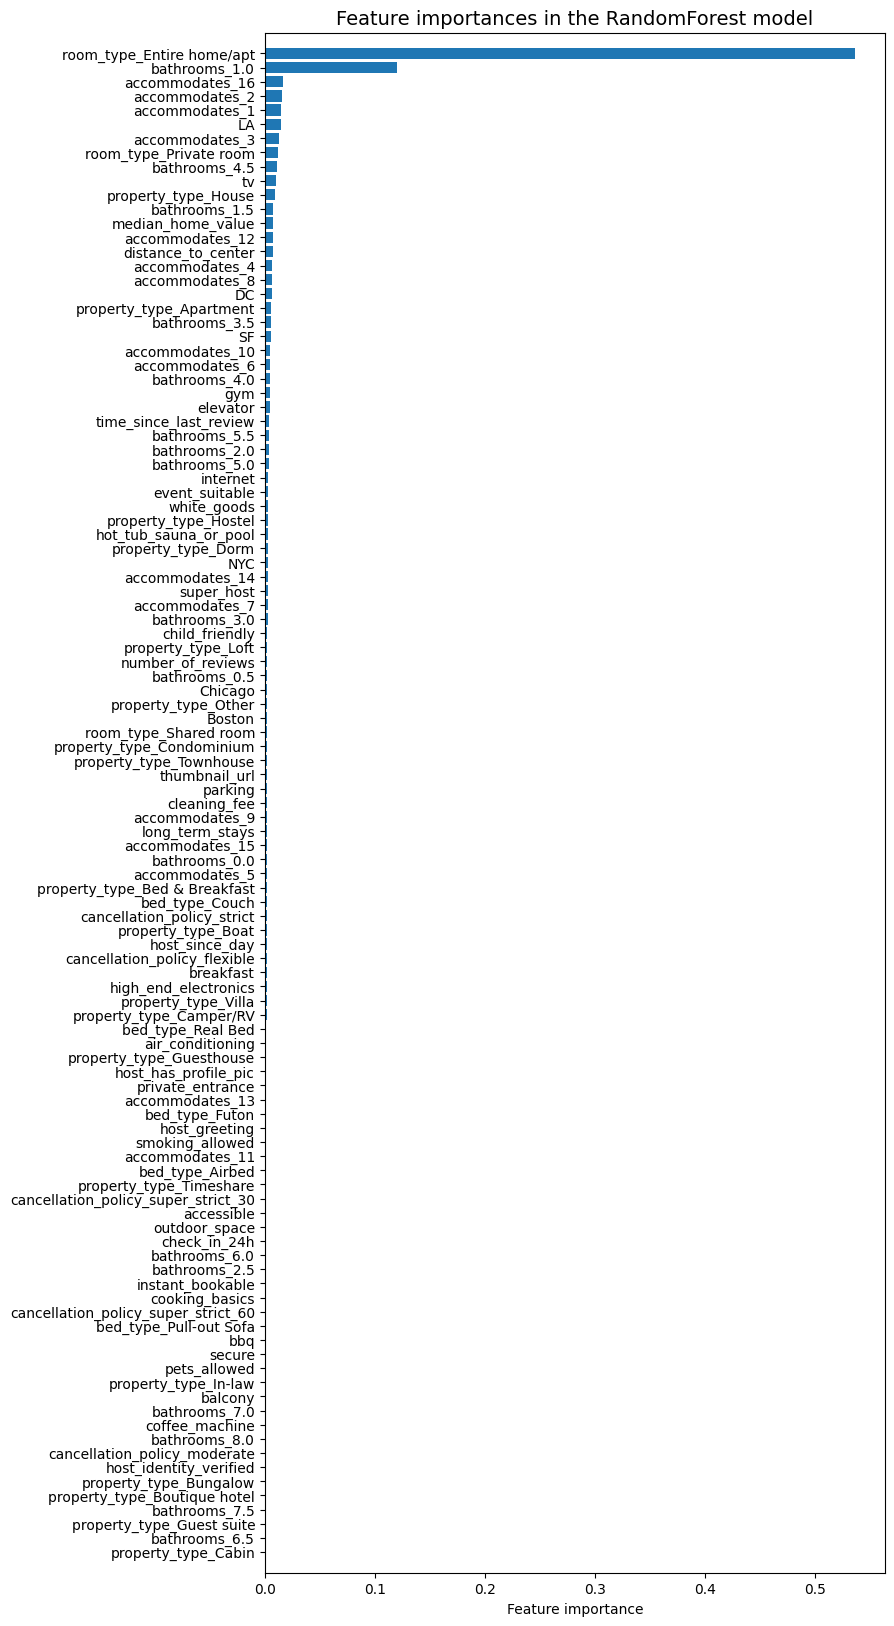

In [50]:
# Plotting feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(8,20))
plt.barh(ft_weights_xgb.index, ft_weights_xgb.weight, align='center') 
plt.title("Feature importances in the RandomForest model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.01)
plt.show()



In [43]:
k_t = pd.DataFrame({"gercek_y": np.exp(y[0:50]),
                    "tahmin_y": np.exp(xgb.predict(X)[0:50])})

k_t

,gercek_y,tahmin_y
8168,130.0,117.640343
63508,50.0,71.381676
62179,199.0,184.796707
35404,80.0,85.111206
24505,59.0,62.740379
69694,350.0,217.654800
20741,295.0,137.382507
24299,876.0,443.923218
22705,100.0,89.086082
32856,125.0,137.409836


## Lineer Regresyon

In [72]:
from sklearn.linear_model import LinearRegression

In [73]:
lr = LinearRegression()

lr.fit(x_train,y_train)

y_pred_lr = lr.predict(x_test)

mae_lr = metrics.mean_absolute_error(y_test, y_pred_lr)
mse_lr = metrics.mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr))
r2_lr = metrics.r2_score(y_test, y_pred_lr)


print('\nMean Absolute Error of Linear Regression     : ', mae_lr)
print('\nMean Squarred Error of Linear Regression     : ', mse_lr)
print('\nRoot Mean Squarred Error of Linear Regression: ', rmse_lr)
print('\nR2 Score of Linear Regression                : ', r2_lr)


Mean Absolute Error of Linear Regression     :  0.3196155355734213

Mean Squarred Error of Linear Regression     :  0.18165204149474853

Root Mean Squarred Error of Linear Regression:  0.42620657138850937

R2 Score of Linear Regression                :  0.6395165914769574


## Random Forest

In [74]:
rf = RandomForestRegressor()

rf.fit(x_train,y_train)

y_pred_rf = rf.predict(x_test)

mae_rf = metrics.mean_absolute_error(y_test, y_pred_rf)
mse_rf = metrics.mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf))
r2_rf = metrics.r2_score(y_test, y_pred_rf)


print('\nMean Absolute Error of Random Forest Regressor     : ', mae_rf)
print('\nMean Squarred Error of Random Forest Regressor     : ', mse_rf)
print('\nRoot Mean Squarred Error of Random Forest Regressor: ', rmse_rf)
print('\nR2 Score of Random Forest Regressor                : ', r2_rf)


Mean Absolute Error of Random Forest Regressor     :  0.28559453296998505

Mean Squarred Error of Random Forest Regressor     :  0.15168758309088295

Root Mean Squarred Error of Random Forest Regressor:  0.3894709014687528

R2 Score of Random Forest Regressor                :  0.6989802232153579


In [77]:
ft_weights_rf = pd.DataFrame(rf.feature_importances_, columns=['weight'], index=x_train.columns)
ft_weights_rf.sort_values('weight', inplace=True,ascending=False)
ft_weights_rf[:20]

,weight
room_type_Entire home/apt,0.368355
distance_to_center,0.105878
bathrooms_1.0,0.089979
median_home_value,0.073991
host_since_day,0.048707
time_since_last_review,0.044862
number_of_reviews,0.023775
accommodates_2,0.013072
accommodates_1,0.011484
DC,0.008067


In [80]:
RF_features = ft_weights_rf.sort_values('weight', ascending=False).head(9).index.tolist()

In [81]:
RF_features

['room_type_Entire home/apt',
 'distance_to_center',
 'bathrooms_1.0',
 'median_home_value',
 'host_since_day',
 'time_since_last_review',
 'number_of_reviews',
 'accommodates_2',
 'accommodates_1']

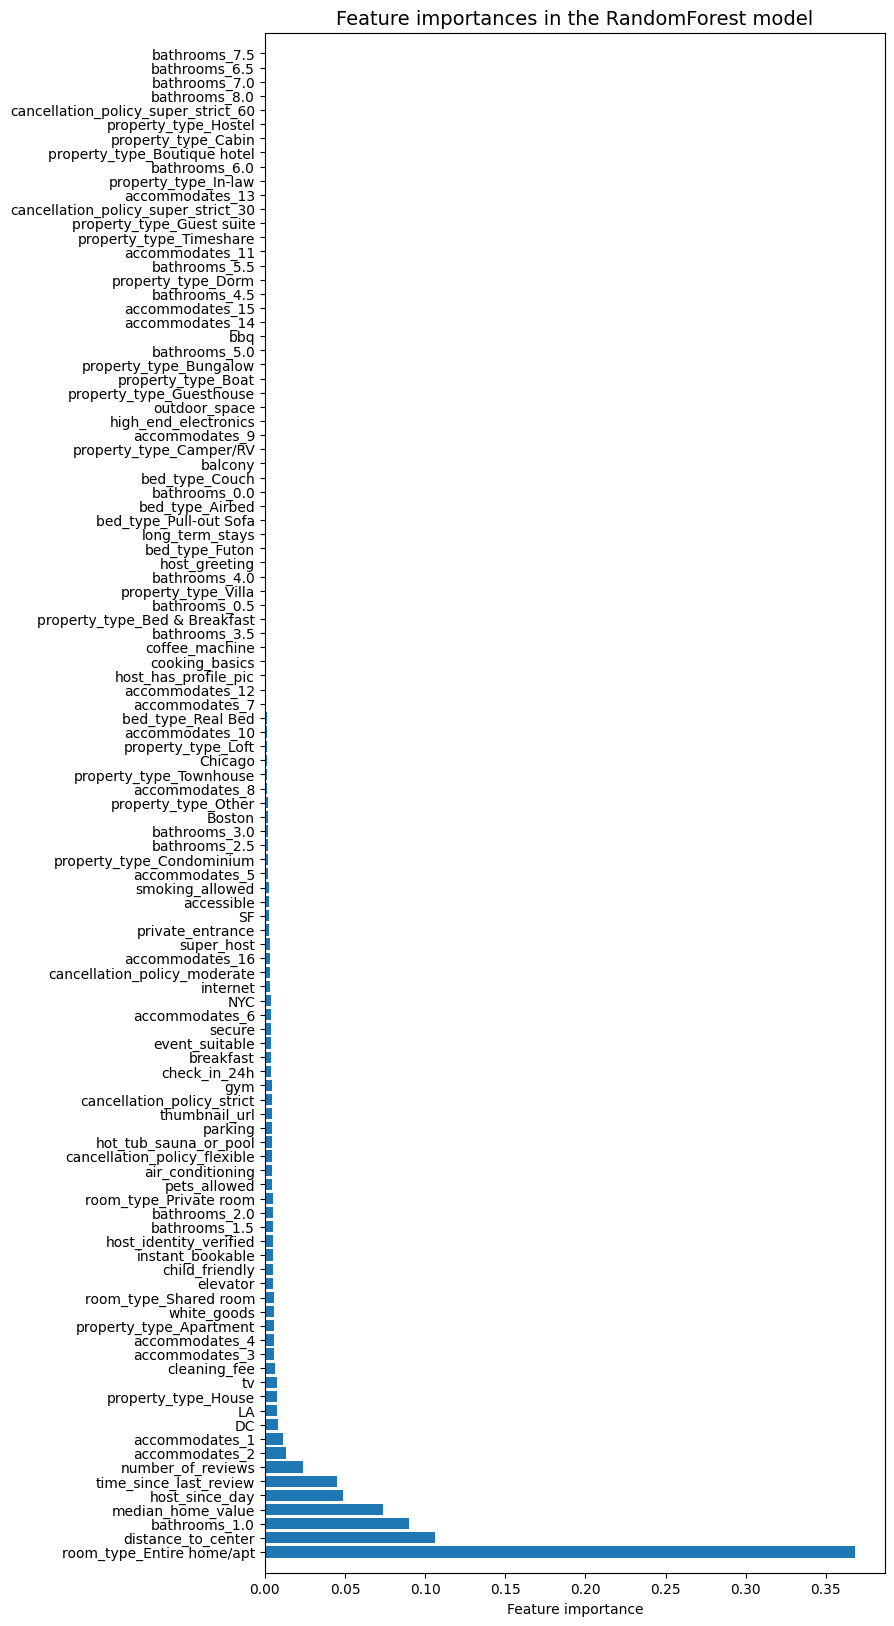

In [82]:
# Plotting feature importances
plt.figure(figsize=(8,20))
plt.barh(ft_weights_rf.index, ft_weights_rf.weight, align='center') 
plt.title("Feature importances in the RandomForest model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.01)
plt.show()

## Ridge

In [ ]:
from sklearn.linear_model import Ridge
model = Pipeline([
    ('poly', PolynomialFeatures()),
    ('ridge', Ridge(fit_intercept=True))
])

param_grid = {
    'poly__degree': [1, 2, 3],
    'ridge__alpha': [0.1, 0.5, 1.0, 2.0]
}

# Perform grid search with 5-fold cross-validation

poly_tuned = GridSearchCV(model, param_grid, cv=5)

#Traning and Testing

poly_tuned.fit(x_train, y_train)

y_pred_poly = poly_tuned.predict(x_test)


mae_poly  = metrics.mean_absolute_error(y_test, y_pred_poly)
mse_poly  = metrics.mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(metrics.mean_squared_error(y_test, y_pred_poly))
r2_poly   = metrics.r2_score(y_test, y_pred_poly)


print('\nMean Absolute Error of Polynomial Regression     : ', mae_poly)
print('\nMean Squarred Error of Polynomial Regression     : ', mse_poly)
print('\nRoot Mean Squarred Error of Polynomial Regression: ', rmse_poly)
print('\nR2 Score of Polynomial Regression                : ', r2_poly)

## CatBoost

In [35]:
model_CBR = CatBoostRegressor()

model_CBR.fit(x_train, y_train)

cross_val_score(model_CBR, x_train, y_train,
                           scoring='r2',
                           cv=KFold(n_splits=5,
                                    shuffle=True,
                                    random_state=2022,
                                    ))

y_pred_cbr = model_CBR.predict(x_test)

mae_cbr  = metrics.mean_absolute_error(y_test, y_pred_cbr)
mse_cbr  = metrics.mean_squared_error(y_test, y_pred_cbr)
rmse_cbr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_cbr))
r2_cbr   = metrics.r2_score(y_test, y_pred_cbr)


print('\nMean Absolute Error of CatBoost Regressor     : ', mae_cbr)
print('\nMean Squarred Error of CatBoost Regressor     : ', mse_cbr)
print('\nRoot Mean Squarred Error of CatBoost Regressor: ', rmse_cbr)
print('\nR2 Score of CatBoost Regressor                : ', r2_cbr)

Learning rate set to 0.078012
0:	learn: 0.6787124	total: 201ms	remaining: 3m 20s
1:	learn: 0.6520244	total: 223ms	remaining: 1m 51s
2:	learn: 0.6281689	total: 240ms	remaining: 1m 19s
3:	learn: 0.6065772	total: 268ms	remaining: 1m 6s
4:	learn: 0.5873416	total: 288ms	remaining: 57.4s
5:	learn: 0.5706876	total: 312ms	remaining: 51.7s
6:	learn: 0.5557246	total: 352ms	remaining: 49.9s
7:	learn: 0.5431419	total: 389ms	remaining: 48.2s
8:	learn: 0.5317524	total: 441ms	remaining: 48.5s
9:	learn: 0.5217267	total: 475ms	remaining: 47s
10:	learn: 0.5130831	total: 506ms	remaining: 45.5s
11:	learn: 0.5052606	total: 535ms	remaining: 44s
12:	learn: 0.4982740	total: 563ms	remaining: 42.7s
13:	learn: 0.4918691	total: 592ms	remaining: 41.7s
14:	learn: 0.4858789	total: 613ms	remaining: 40.2s
15:	learn: 0.4810683	total: 636ms	remaining: 39.1s
16:	learn: 0.4766081	total: 654ms	remaining: 37.8s
17:	learn: 0.4728627	total: 674ms	remaining: 36.8s
18:	learn: 0.4693851	total: 698ms	remaining: 36s
19:	learn: 0.4

In [47]:
ft_weights_model_CBR = pd.DataFrame(model_CBR.feature_importances_, columns=['weight'], index=x_train.columns)
ft_weights_model_CBR.sort_values('weight', inplace=True)
ft_weights_model_CBR



,weight
bed_type_Futon,0.012442
bed_type_Airbed,0.042379
property_type_Dorm,0.043901
coffee_machine,0.061294
accessible,0.086660
bathrooms_5.5,0.099539
bathrooms_5.0,0.100447
smoking_allowed,0.112591
accommodates_14,0.113644
accommodates_9,0.125513


In [ ]:
CBR_features = ft_weights_model_CBR.sort_values('weight', ascending=False).head(9).index.tolist()

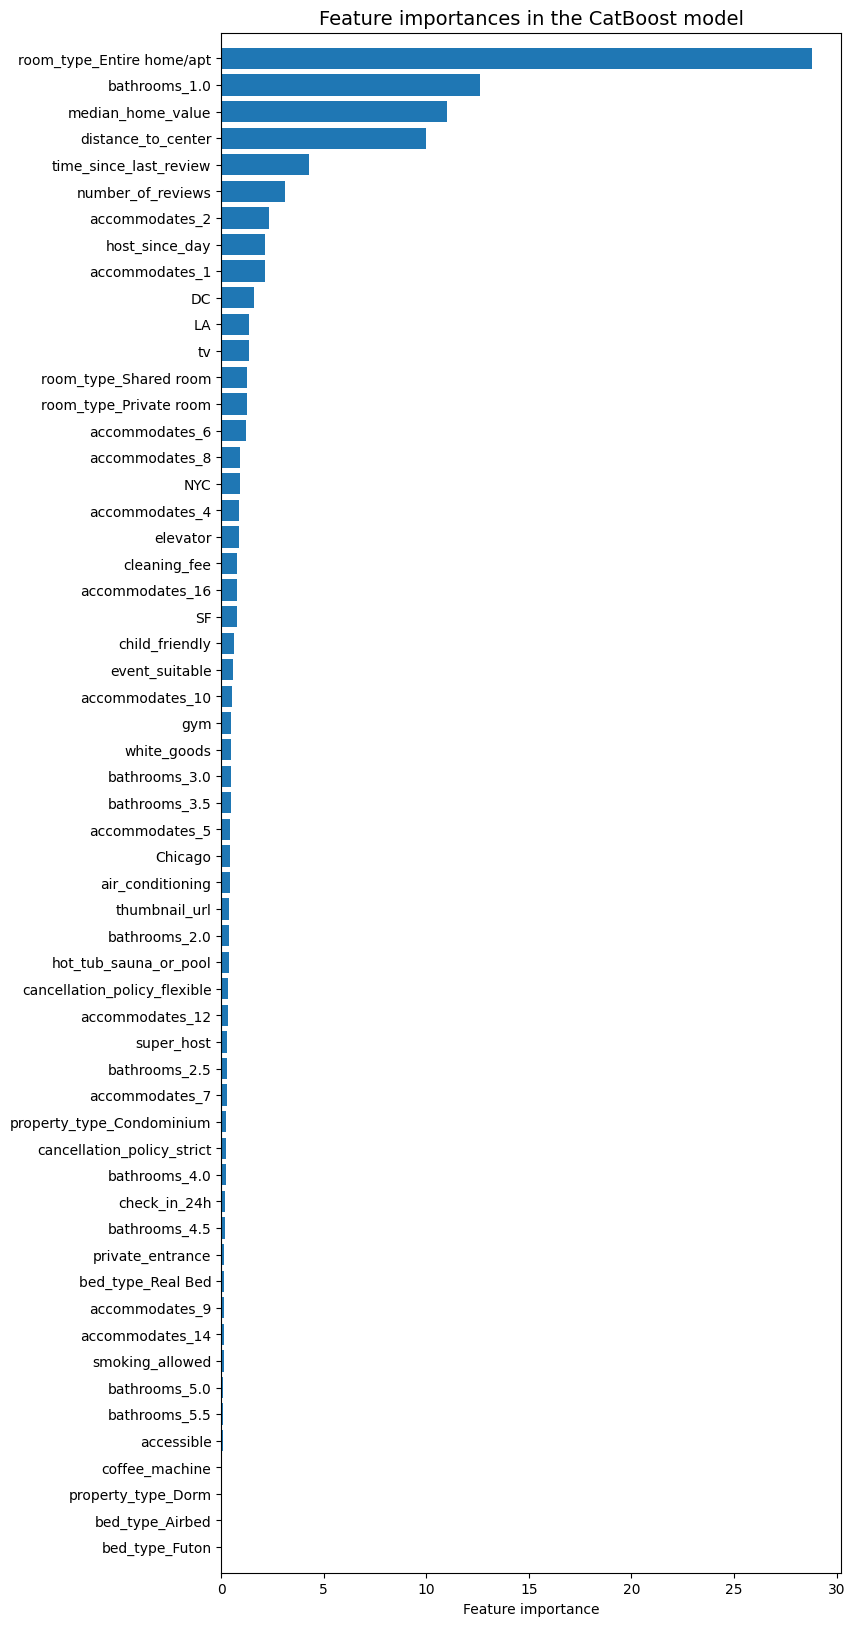

In [48]:
# Plotting feature importances
plt.figure(figsize=(8,20))
plt.barh(ft_weights_model_CBR.index, ft_weights_model_CBR.weight, align='center') 
plt.title("Feature importances in the CatBoost model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.01)
plt.show()

## Gradient Boosting Regresor

In [86]:
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)

gb.fit(x_train, y_train)

y_pred_gb = gb.predict(x_test)

mae_gb  = metrics.mean_absolute_error(y_test, y_pred_gb)
mse_gb  = metrics.mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(metrics.mean_squared_error(y_test, y_pred_gb))
r2_gb   = metrics.r2_score(y_test, y_pred_gb)


print('\nMean Absolute Error of Gradient Boosting     : ', mae_gb)
print('\nMean Squarred Error of Gradient Boosting     : ', mse_gb)
print('\nRoot Mean Squarred Error of Gradient Boosting: ', rmse_gb)
print('\nR2 Score of Gradient Boosting                : ', r2_gb)


Mean Absolute Error of Gradient Boosting     :  0.3045632733215545

Mean Squarred Error of Gradient Boosting     :  0.16767352751922499

Root Mean Squarred Error of Gradient Boosting:  0.40947958132149276

R2 Score of Gradient Boosting                :  0.6672565624815188


In [87]:
ft_weights_gb = pd.DataFrame(gb.feature_importances_, columns=['weight'], index=x_train.columns)
ft_weights_gb.sort_values('weight', inplace=True)
ft_weights_gb

,weight
bed_type_Pull-out Sofa,0.000000
pets_allowed,0.000000
long_term_stays,0.000000
accommodates_11,0.000000
accommodates_13,0.000000
...,...
time_since_last_review,0.025556
median_home_value,0.073032
distance_to_center,0.075345
bathrooms_1.0,0.120905


In [90]:
GRB_features = ft_weights_gb.sort_values('weight', ascending=False).head(7).index.tolist()
GRB_features

['room_type_Entire home/apt',
 'bathrooms_1.0',
 'distance_to_center',
 'median_home_value',
 'time_since_last_review',
 'accommodates_2',
 'accommodates_1']

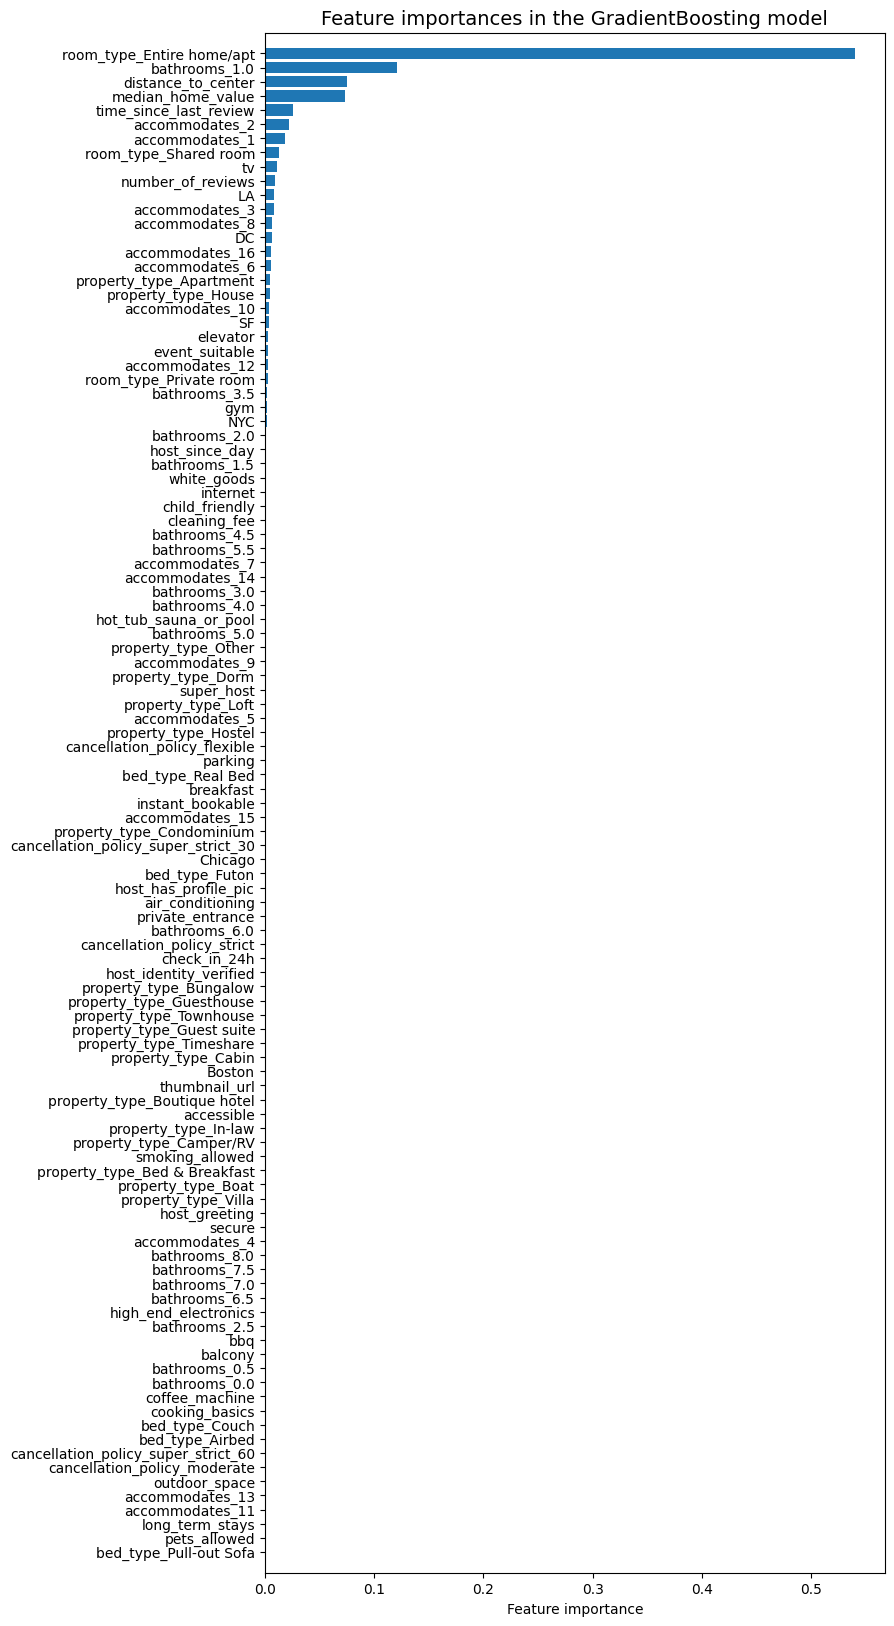

In [88]:
# Plotting feature importances
plt.figure(figsize=(8,20))
plt.barh(ft_weights_gb.index, ft_weights_gb.weight, align='center') 
plt.title("Feature importances in the GradientBoosting model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.01)
plt.show()

## GRB Tuning

In [91]:
df_random_10_percent = final_df.sample(frac=0.10)

X = df_random_10_percent[GRB_features]
y = df_random_10_percent['log_price']

x_train ,x_test ,y_train ,y_test  = train_test_split(X,y,test_size=0.2,random_state=42)

In [92]:
gbm_params = {
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'max_depth': [3, 5, 8,50,100],
    'n_estimators': [200, 500, 1000, 2000],
    'subsample': [1,0.5,0.75],
}

gbm = GradientBoostingRegressor()
gbm_cv_model = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2)
gbm_cv_model.fit(x_train, y_train)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


c:\Users\yunus\AppData\Local\Programs\Python\Python39\lib\site-packages\joblib\externals\loky\process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 8, 50, 100],
                         'n_estimators': [200, 500, 1000, 2000],
                         'subsample': [1, 0.5, 0.75]},
             verbose=2)

In [93]:
gbm_cv_model.best_params_

{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 1000, 'subsample': 0.5}

In [94]:
gbm_tuned = GradientBoostingRegressor(learning_rate = 0.1,  
                                      max_depth = 5, 
                                      n_estimators = 200, 
                                      subsample = 0.5)

gbm_tuned = gbm_tuned.fit(x_train,y_train)

In [95]:
y_pred = gbm_tuned.predict(x_test)
np.sqrt(mean_squared_error(y_test, y_pred))

0.4653544203480962

In [ ]:
Importance = pd.DataFrame({"Importance": gbm_tuned.feature_importances_*100},
                         index = x_train.columns)

In [ ]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

# Light GBM

## Compare

In [37]:
r2_list = {"Linear Regression": r2_lr,
          "Random Forest": r2_rf ,
          "Polynomial Regression": r2_poly,
          "CatBoost": r2_cbr,
          "Gradient Boosting":r2_gb ,
          "XGBoost": r2_xgb}

mae_list = {"Linear Regression": mae_lr,
          "Random Forest": mae_rf ,
          "Polynomial Regression": mae_poly,
          "CatBoost": mae_cbr,
          "Gradient Boosting":mae_gb ,
          "XGBoost": mae_xgb}

mse_list = {"Linear Regression": mse_lr,
          "Random Forest": mse_rf ,
          "Polynomial Regression": mse_poly,
          "CatBoost": mse_cbr,
          "Gradient Boosting":mse_gb ,
          "XGBoost": mse_xgb}

rmse_list = {"Linear Regression": rmse_lr,
          "Random Forest": rmse_rf ,
          "Polynomial Regression": rmse_poly,
          "CatBoost": rmse_cbr,
          "Gradient Boosting":rmse_gb ,
          "XGBoost": rmse_xgb}

In [38]:
a1 =  pd.DataFrame.from_dict(r2_list, orient = 'index', columns = ["R2 SCORE"])
a2 =  pd.DataFrame.from_dict(mae_list, orient = 'index', columns = ["MEAN ABSOLUTE ERROR"])
a3 =  pd.DataFrame.from_dict(mse_list, orient = 'index', columns = ["MEAN SQUARRED ERROR"])
a4 =  pd.DataFrame.from_dict(rmse_list, orient = 'index', columns = ["ROOT MEAN SQUARRED ERROR"])

In [39]:
org = pd.concat([a1, a2, a3, a4], axis = 1)
org

,R2 SCORE,MEAN ABSOLUTE ERROR,MEAN SQUARRED ERROR,ROOT MEAN SQUARRED ERROR
Linear Regression,0.625480,0.325222,0.188725,0.434425
Random Forest,0.688581,0.289926,0.156928,0.396141
Polynomial Regression,0.679255,0.300171,0.161627,0.402029
CatBoost,0.709775,0.282047,0.146248,0.382424
Gradient Boosting,0.659990,0.307882,0.171335,0.413927
XGBoost,0.700839,0.286128,0.150751,0.388267


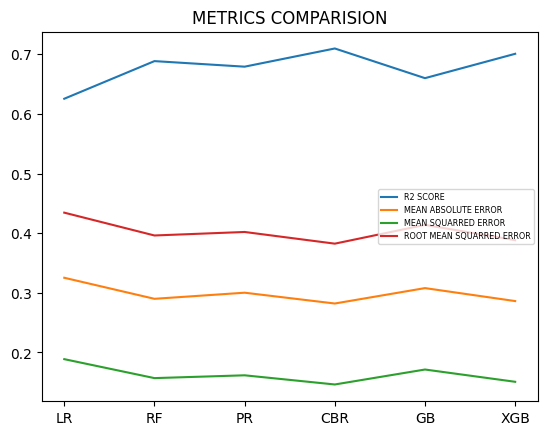

In [64]:
alg = ['LR','RF','PR','CBR','GB','XGB']
plt.plot(alg,a1)
plt.plot(alg,a2)
plt.plot(alg,a3)
plt.plot(alg,a4)
legend = ["R2 SCORE", "MEAN ABSOLUTE ERROR", "MEAN SQUARRED ERROR", "ROOT MEAN SQUARRED ERROR"]

plt.title("METRICS COMPARISION")
plt.legend(legend, loc= 'right', fontsize='xx-small')
plt.show()

# Tuning


{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
-0.19884401094124401

# Modeling notlar

## Geri donup denenecek yerler

- 
- Litaraturde hangi modeller neden kullanilmis
- Genl olarak modellerin ozellikleri, hangisi bizimkine uygun
- PCA
- Importanceleri belirlmek icin hangi yontemler var
- Gercek deger tahmin deger inclemesi(satirlar icin)
- Ml1 dersinde son yarim saat
- Name ve description ile alakali litaratur

In [57]:
parameters = {
    'fit_intercept': [True, False],  # Whether to calculate the intercept for the model
    'copy_X': [True, False],  # Whether to copy the input features before fitting
    'n_jobs': [-1]  # Number of parallel jobs to run (-1 uses all available processors)
    # Add more hyperparameters as needed
}    

In [59]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(lr.fit(x_train,y_train), parameters, cv=5)
grid_search.fit(x_train, y_train)

# Print the best hyperparameters and best score
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'copy_X': True, 'fit_intercept': False, 'n_jobs': -1}


In [60]:
best_model = grid_search.best_estimator_
y_pred_best_model = best_model.predict(x_test)
y_pred_best_model

array([4.89312446, 4.85218338, 5.51541678, ..., 4.93997269, 4.69174856,
       5.78924516])

In [ ]:
'''r2 = r2_score(y_test, y_pred_best_model)
mse = mean_squared_error(y_test, y_pred_best_model)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_best_model)
print("R-squared score:", r2)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)'''

In [70]:
random_state = 42
regresyon = [
             
             RandomForestRegressor(random_state = random_state),
            
             GradientBoostingRegressor(),
             XGBRegressor(),
             CatBoostRegressor()
             ]


rf_reg_param_grid = {
    "max_features": [1, 3, 10],
    "min_samples_split": [2, 3, 10],
    "min_samples_leaf": [1, 3, 10],
    "n_estimators": [100, 300],
    "criterion": ["mse", "mae"]
}



gbm_reg_params_grid = {
    "learning_rate": [0.01, 0.1],
    "n_estimators": [500, 1000],
    "max_depth": [3, 5],
    "min_samples_split": [2, 5]
}

xgb_reg_params_grid = {
    'n_estimators': [100],
    'subsample': [0.6],
    'max_depth': [3],
    'learning_rate': [0.1],
    'min_samples_split': [2]
}
catb_reg_params_grid = {
    'iterations': [200, 500],
    'learning_rate': [0.01, 0.05],
    'depth': [3, 5]
}
regresyon_param = [
    {'criterion': ['squared_error', 'friedman_mse', 'poisson', 'absolute_error'], 'n_estimators': [100, 200, 300]},



                    rf_reg_param_grid,
                    gbm_reg_params_grid,
                    xgb_reg_params_grid,
                    catb_reg_params_grid
                   ]

In [71]:
# cv_result = []
# best_estimators = []
# best_params = []

# for i in range(len(regresyon)):
#     clf = GridSearchCV(regresyon[i], param_grid=regresyon_param[i], cv=KFold(n_splits=10), scoring="neg_mean_squared_error", n_jobs=-1, verbose=1)
#     clf.fit(x_train, y_train)
#     cv_result.append(clf.best_score_)
#     best_params.append(clf.best_params_)
#     best_estimators.append(clf.best_estimator_)
#     print(cv_result[i])


Fitting 10 folds for each of 12 candidates, totalling 120 fits
